In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("/Users/lpozzi/Documents/GitHub/polso/strava/")

import pandas as pd


from strava_dash import StravaScraper

In [2]:
%%capture
training = StravaScraper()
training.get_swims(after='2017-11-01', before='2018-09-30')
training.get_xtraining(after='2017-11-01', before='2018-09-30')

After last year's [Catalina Channel](http://mrpozzi.github.io/2018/01/15/catalina-men/) I figured I was ready for some other challenge. The famous [20 Bridges](https://www.nyopenwater.org/20-bridges-swim), i.e. the circumnavigation of Manhattan Island, was the first thing that popped to my mind.

This is part of the [Triple Crown of Marathon Swimming](http://openwaterpedia.com/index.php?title=Triple_Crown) and an extremely scenic swim: it's a rare feature to have such a view all the way through a marathon swim (specially one in a Ocean..)

Since the date I found was quite early in the season I also figured I had enough time to fit in yet another swim, and that's when I thought of the length of [Lake Tahoe](http://openwaterpedia.com/index.php?title=Lake_Tahoe#Lengthwise_Swims).

As the season unrolled and after the Manhattan swim I felt good about my training and general fitness, so I decided to squeeze a bit more out of the season and to swim the [Santa Barbara Channel](https://santabarbarachannelswim.org), from [Anacapa to Oxnard](https://santabarbarachannelswim.org/anacapa-roadmap/), so to complete the [Triple Crown of California](https://santabarbarachannelswim.org/california-triple-crown/) and close the season in style.

These are quite different swims, being in quite different bodies of water, and my training this season also changed quite a bit, teaching few important lessons.

### The Plan

In my mind I was going to just rinse and repeat what I did the year before to prepare for the Catalina Channel. Basically keep at a solid 30k yards per week, allowing for peaks around 35k/40k. Using the pool to get some cheap yards in winter, when water is cold, and to fill up the bucket later in the season too. 

| Month    | Days | Yardage |    Yds/Day   |  Yds/Week |  max hrs  |
| :------- |:---: | :-----: | :----------: | :-------: | :-------: |
| November | 30   |  80000  | 2,857.14285  |   20000   |    7.6    |
| December | 31   | 125000  | 4032.258065  |   25000   |    7.6    |
| January  | 31   | 125000  | 4032.258065  |   28000   |    7.6    |
| February | 28   | 130000  | 4642.857143  |   32500   |    9.8    |
| March    | 31   | 140000  | 4516.129032  |   31615   |   10.6    |
| April    | 31   | 140000  | 4516.129032  |   31615   |   10.6    |
| May      | 31   | 140000  | 4516.129032  |   31615   |    8.5    |
| June     | 30   | 150000  | 5000         |   35000   |   11.4    |

A classic of this strategy is to hit [Tsunami's](http://sftsunami.org/swim-coaches/) Saturday workouts for 7k in 2 hours and then finish off with another hour or so in the Bay. It worked once, it must work again(and again and again....)

## The Execution

**WRONG!**

This didn't work out at all. My execution was very poor and I had to figure out how to adjust and roll with the punches. As you can see below my weekly yardage hardly surpassed 30k and hovered between 20k and 25k for most of the time.

In [16]:
training.monthly_yardage.loc[['November', 'December', 'January', 'February', 
                          'March', 'April', 'May', 'June', 'July',
                          'August', 'September']]

distance      hours  weekly distance
start_date                                           
November     78246.264446  23.200000     19561.566112
December     97274.312919  27.511667     24318.578230
January      66520.140582  19.327222     16630.035146
February     78037.494297  22.824167     19509.373574
March       126980.041349  38.380833     31745.010337
April       106163.393721  30.941111     26540.848430
May          91044.672915  28.476667     22761.168229
June        121913.564941  28.591667     30478.391235
July         92905.122247  27.617778     23226.280562
August       13375.943910   4.436944      3343.985977
September    63659.803627  17.061944     15914.950907

### Year on Year

To give a better idea of how much less this is wrt last year let's compare the two seasons directly

In [9]:
%%capture
training_old = StravaScraper()
training_old.get_swims(after='2017-01-01', before='2017-09-05')

In [10]:
Markdown("""
##### Year on Year: 2017/2018 = {0:%} 2016/2017
""".format(training.total_yards / float(training_old.total_yards)))  


##### Year on Year: 2017/2018 = 81.263238% 2016/2017


In [11]:
training.in_out / training_old.in_out

total  percentage
is_pool                         
open water  0.949321    1.168204
pool        0.611793    0.752853

So I swam 20% less yards than last year. Pool was drastically decreased by 40% while the percentage of training yards in open water increased by 16% wrt last year. We'll see in the next section how this is one of the most important lessons I learned.

In [20]:
monthly_yoy = pd.merge(left=training.monthly_yardage, right=training_old.monthly_yardage, how='inner', #on='start_date',
         left_index=True, right_index=True, sort=True,
         suffixes=('_new', '_old'))

monthly_yoy['distance_yoy'] = monthly_yoy.distance_new / monthly_yoy.distance_old
monthly_yoy['weekly_distance_yoy'] = monthly_yoy['weekly distance_new'] / monthly_yoy['weekly distance_old']
monthly_yoy['hours_yoy'] = monthly_yoy.hours_new / monthly_yoy.hours_old

monthly_yoy[['distance_yoy', 'weekly_distance_yoy', 'hours_yoy']].loc[['January', 'February', 
                          'March', 'April', 'May', 'June', 'July']].style.format("{:.2%}")


### The World's smallest violin

I hate complaints and don't see the point of finding excuses: my plan didn't work and I didn't have the discipline and mental fortitude to follow up.

However, I think that explaining what are the snags I hit it's helpful since they bore lessons that made me a better athlete in the long run. I also strongly believe in adapting to the conditions more than in brute force, so, being honest about the blockers is the first step to get around them (since I'm not strong enough to just brute force past them).

The weekly yardage plot below shows significant ups and downs, falling/rising/falling again. Main reasons for these were the brutally cold season, the loss of acclimation after the closure time due to the [sealion attacks](https://www.sfgate.com/bayarea/article/Fourth-sea-lion-attack-at-SF-s-Aquatic-Park-12490740.php) and to the particularly bad strain of flu that knocked me down for few weeks and dragged on even after I treated with antibiotics. The sealion accidents also relegated most of us to swimming close to shore, which made it particularly tough mentally.

Another large factor was boredom in the pool. I entered this circle of showing up, getting frustrated at the practice, being not yard intensive enough or too technical, and getting out early, generating more anger and frustration in not being able to crunch enough yards.

If you add to this the lack of momentum created by the lack of the novelty anxiety and the lack of stable training partners you have the full picture of what was going through my mind around February.

I even considered calling off the season... but I'm glad I didn't since I ended up learning a lot about how to get around these issues.

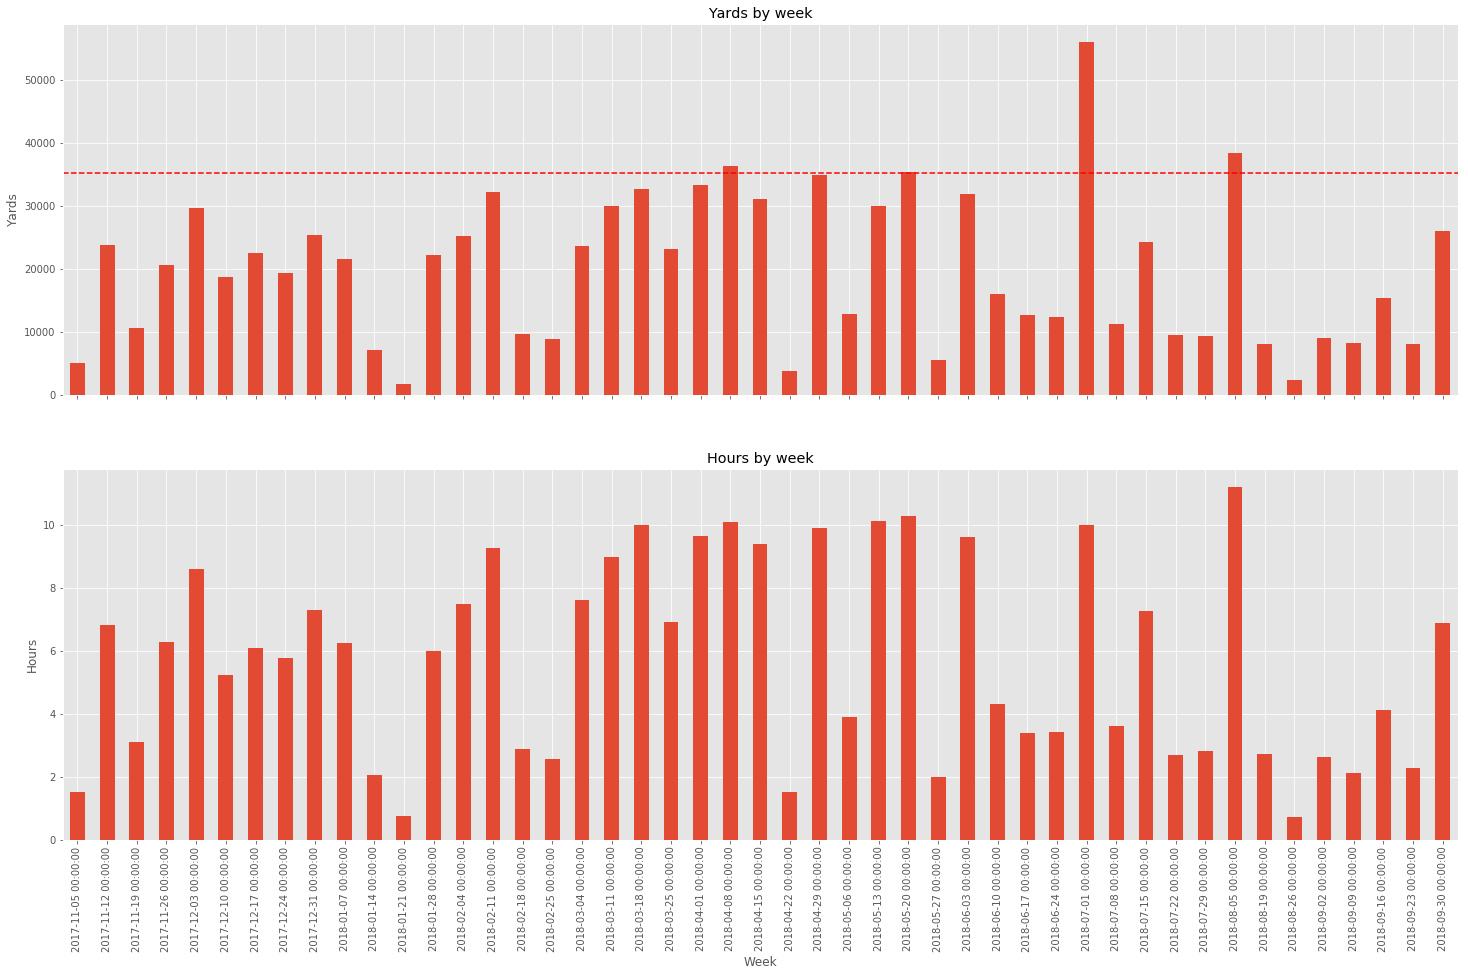

In [6]:
tmp = training.plot_summary()

### Paradigm shift

Since my plan wasn't working at all I started talking to people and thinking. Fortunately I'm surrounded by so many extremely talented swimmers that getting different perspectives is easy.

I am specifically grateful to [Ryan](http://openwaterpedia.com/index.php?title=Ryan_Utsumi), [Catherine](http://openwaterpedia.com/index.php?title=Catherine_Breed), and [Duke](http://openwaterpedia.com/index.php?title=Duke_Dahlin) for their insight and friendship.

The main shift has been to mix it up: more time in the Bay, using the pool as a tool to build quality and speed and the Bay as the main source of yards. A big swim in the weekend builds more expectation and focus than a "death by thousand cuts". This can be accentuated by traveling to get a milestone swim somewhere else: I got a great 4 and 6 hours in San Diego, hard, choppy and cold. Once you fly somewhere you're too invested to turn back: you have to make it! Same can be said with a long week end swim: you waited the whole week to do this and if you don't make it it's irreparable (which silences the voice in your head tempting you to go short today and make up for it another day...).


Another interesting approach is to focus more on intensity. Between a 8 hours swim and two back to back 4 hours swim on consecutive days, go for the second. This is not a good option for your first swim, but once you mentally get the gist there isn't much more value to go longer than 6 hours (at least if you're around 2 miles per hour pace). Of course having multiple crossings in a season offers the opportunity of having a high intensity 8+ hours swim and to use it as a training for the swims you care the most for, but instead of looping around for 8 hours I see more value in splitting the time on two days/sessions, to get better quality and to get used to swim when your body is already tired.


This is not a way to get around putting in yards and time, but a way to put in more quality than quantity, or, to put in plenty of quality yards instead of a huge amount of uneventful ones.


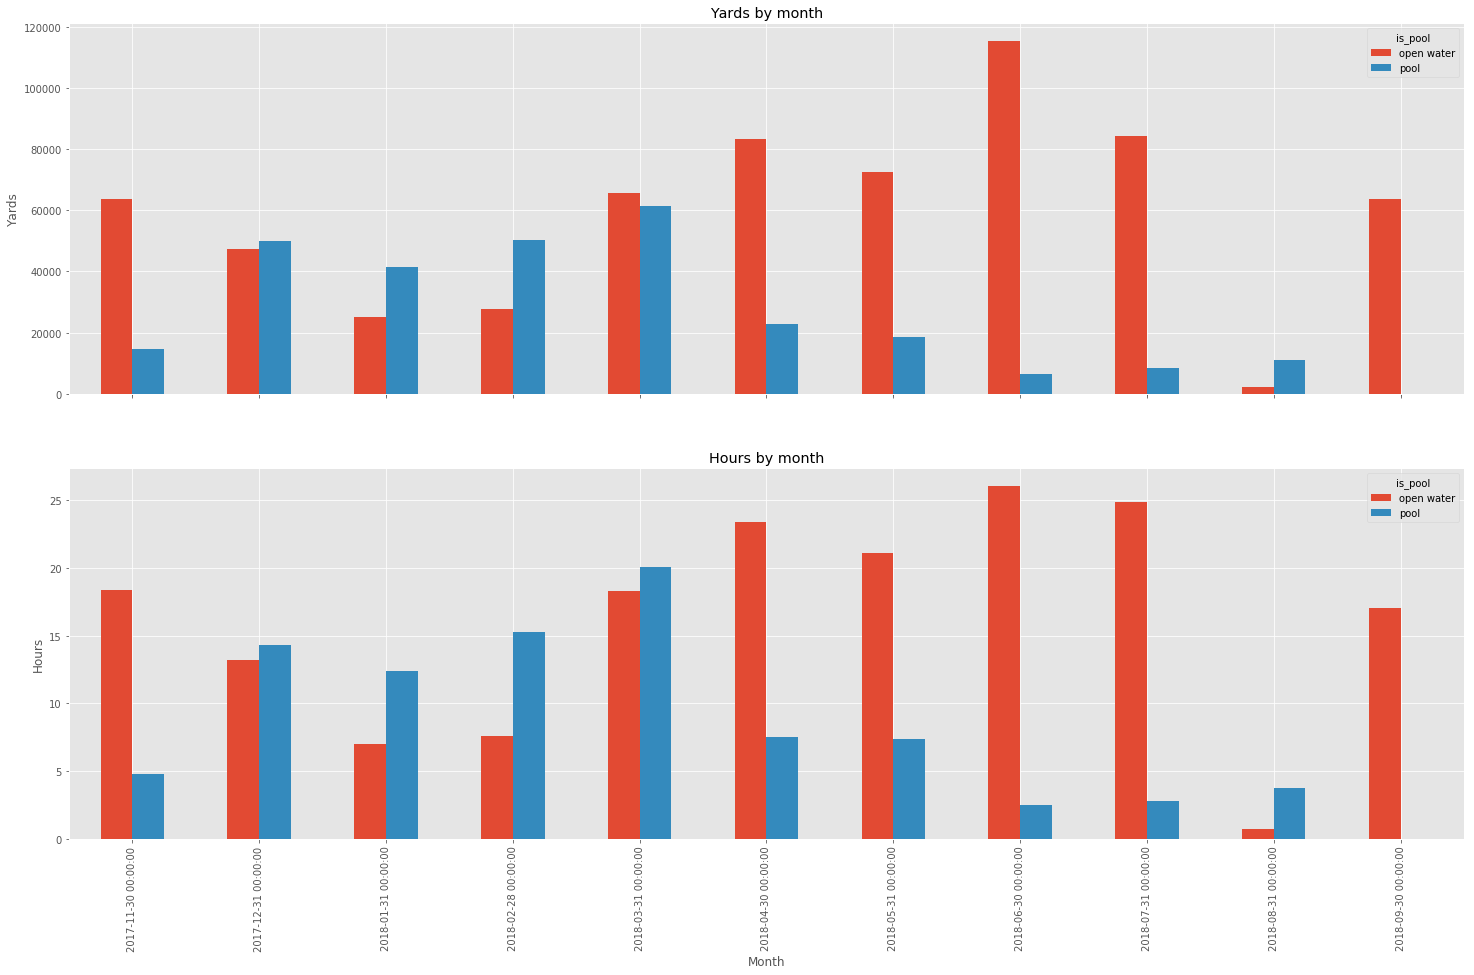

In [7]:
tmp = training.plot_summary(in_n_out=True, by='month')

### Crosstraining

Crosstraining also helped immensely in switching it up and in getting more strength. This specially helped me to strengthen up my hips (which gave me issues last year) and I'll be going down the route of more running, more Yoga and more strength training at [Body Works SF](https://www.bodyworksf.com/).

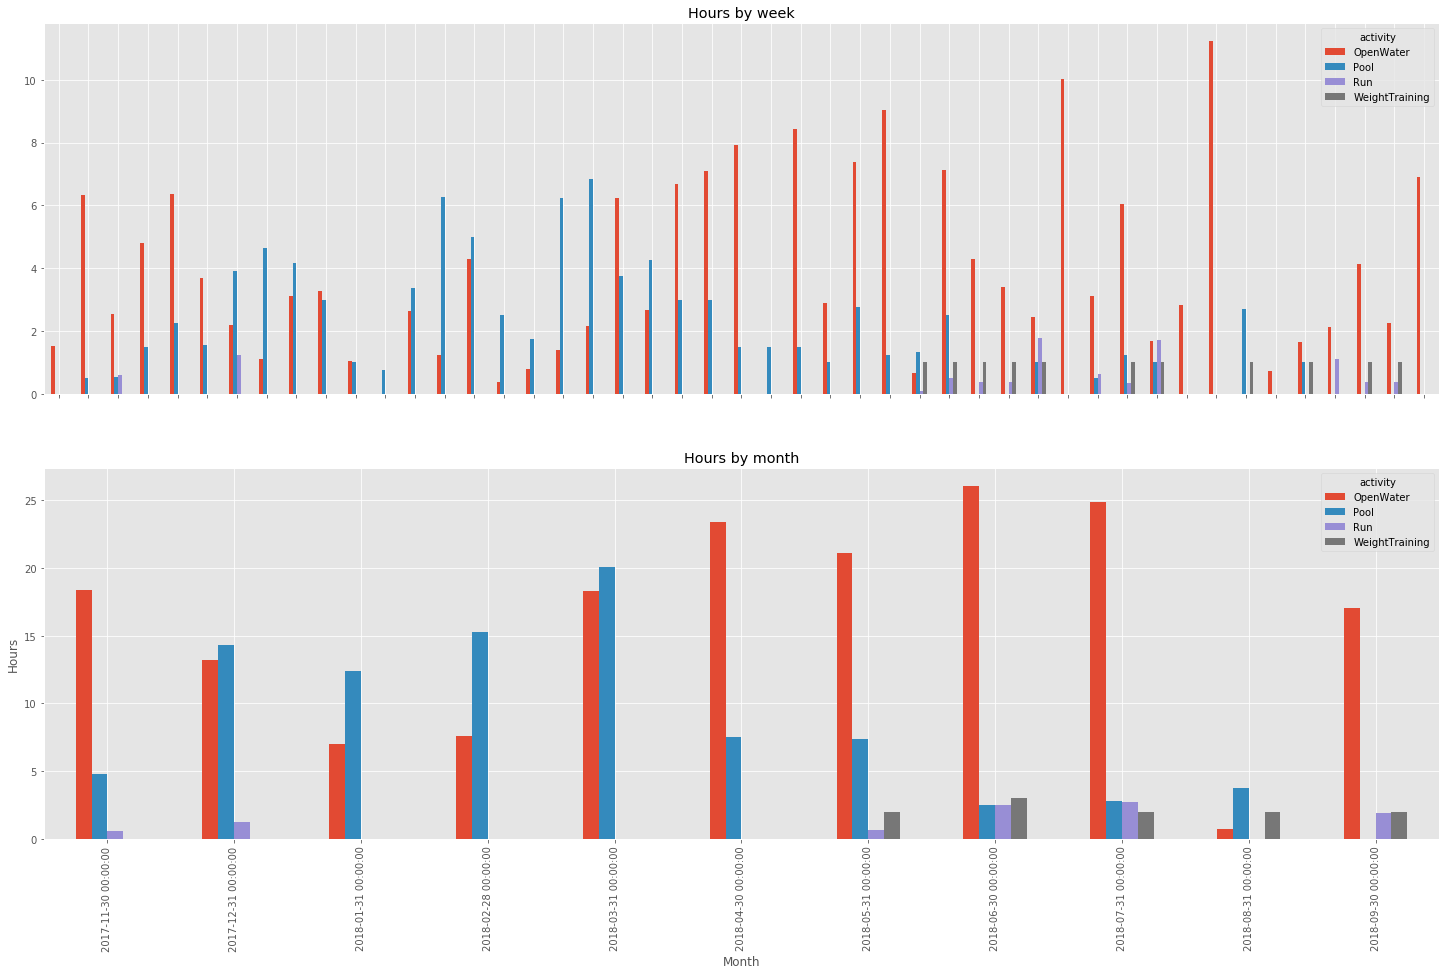

In [8]:
tmp=training.plot_x_training()

## The Crossings

### 20 Bridges

Signing up for this swim is one of its main challenges: just like Hamilton tickets you have to be online and ready on Novemember 1st at 9am Pacific time and even a small delay may put you on the waitlist or worse. This is a super popular swim which gathers an extremely international crowd. Be sure to have a few dates options: the swim has 4 monthly dates, from June to September, 15 swimmers per date. Good Luck!


On this swim I had my own parents as my crew, which they really loved! They finally got to see how much fun I'm having doing this and it made clear that I'm not suffering but full of joy (even when things aren't easy). They brought all their Love and cheered all the way through, I am so grateful. Only advice for the crew is to be ready for rain or shine, it could get extremely hot (I swam through a heat wave) and not all boats have a toilet, even if they claim to. Our captain (Lenny Brown of "O C'mon") pointed at a jar when we asked him where the toilet was. So.. be prepared...


The swim is quite technical, I had the fortune of receiving a great description of the challenges from [Louise Darlington](https://lhyderdarlington.wordpress.com/), an awesome open water coach and swimmer, which put together a super comprehensive summary of the swim. I'm reporting a few of those thoughts here, but the credit goes to her.

The first thing to realize is that this is a quick swim: likely under 10 hours, but sub 8 for sure if you're a fast swimmer. The tides turn every 6 hours, so you have to "dance" with them and be at the right place at the right time, i.e. in the Harlem by end of flood and in the Hudson by beginning of Ebb, otherwise you might find yourself wrestling the tide, and we all know who wins...


The swim is impeccably organized by [Rondi Davies](http://openwaterpedia.com/index.php?title=Rondi_Davies) and [David Barra](http://openwaterpedia.com/index.php?title=David_Barra). David seems to be everytwhere at once on the rivers and gave me an extra boost when he showed up on the Harlem river to deliver an italian flag to my kayaker! That is one of the things that made my day.

Rondi runs a smooth operation and is the ultimate authority on timing the waves. I was perplexed since I found myself in a wave I thought to be too fast and I got proven wrong: the timing was perfect. Be honest and trust her.

You're assigned a Kayaker, and they're top of the line! Mine, Valerie Thomas, was insanely good! She managed to get through the Hudson in extremely rough conditions and she was always by my side, never missing a beat, with a great attitude and taking me where the water was the fastest. Not only that, but she spoke italian to my parents! 

I'm usually skeptical about using a paddler, specially for feeding. I get apprehensive about them being ok, and I worry about them capsizing and losing my feeds. 

On this swim it's worth it to work super closely with your kayaker for few reasons. The boat is not going to be super reliable and at times it could be impossible for the pilot to follow the swimmer. Currents may be pretty volatile, and the kayaker can be more nimble in taking the swimmer where the water is faster. This matters quite a lot more in a river than in a large lake or an ocean.

Remember to bring ice to keep your feeds cool since the day could get hella hot. For this and to replenish, the kayaker will be going back to the boat from time to time, but they are pretty efficient, and I didn't see this as a big issue. I didn't end up needing the rope since the kayaker is so close to you she can just hand you stuff easily.


The caliber of the [swimmers](https://www.nyopenwater.org/20-bridges-swim/2018-20-bridges-swimmer-biographies/201820b1/) is also outstanding, I had the honor of meeting [Pat Gallant-Charette](http://dailynews.openwaterswimming.com/2018/06/pat-gallant-charette-never-looking-back.html) and posing for a [selfie](https://www.instagram.com/p/BlG3czFjRDI/?taken-by=mrpozzi) together.

Louise decribes the swim as a "chess match between the swimmer and three of the most amazing rivers", and she surely hits the spot since it's all about timing and making it to the right place by the right time. 

Her advice on strategy can be summarized by these 3 rules:

1. Be relaxed, keep your head down (you do not need to sight ever thanks to the kayaker) and just concentrate on swimming well.
2. Feed and hydrate well: specially on hot days you'll be losing a lot of water.
3. Pace: this swim is a Tango with the tides.

These were the mantras that got me through the swim.

I flew up the East River! the flood was ripping and thanks to Valerie we rode it all the way. The view was awesome. We hit Hell's Gate pretty quickly and I did know why is it called so: the water started to churn and got really rough. 

Once I passed it the tide slowed down and died and it started the slow crawl up the Harlem River. I spent maybe 2 hours in the Harlem, cooking in the hot water. Water here was quite smelly and murky and distractions were lacking since the skyline is way less dramatic. Passing the bridges and catching up other swimmers were good distractions, but this was my least favorite part of the swim.

The Spuyten Dyvil (Spitting Devil in Dutch) is really scenic and came as a relief. Against all my beliefs I checked the time: 4 hours and change, half way I thought. Here the boat splits ways and rejoins right after the rail bridge. My parents were cheering super loud and they were so stoked of how I was swimming (still around 70 spm).

Once in the Hudson I cooled off a bit and felt way better, the George Washington bridge seemed 4/5 feeds away (and it was) and I started going at it while the wind picked up and it all turned to hell! The Hudson is really wide and it felt like swimming in the Bay: small chops, head down not to swallow water (I drank gallons of it, it must be clean since I didn't get sick at all), slapping waves at every stroke. I was really impressed by how Valierie kept the pace, the conditions were no joke. She lead me the fastest way and we made good progress, it was a relief when we passed the GW Bridge and from there I gave it all I had and ended up almost catching the second swimmer (missed by 6"!!!!!!). Final time was 8 hours 22'. The tides were slower than other dates, but still decent to finish 3rd among pros.

On the jetski back to the boat the rider joked about how I was the only swimmer smiling as much as at the start. What a great day.

### Tahoe

The next two swims in the season were relatively more straightforward than the 20 Bridges, so I'll zip through them quicker.

After 20 Bridges Tahoe was next. I got one more long swim in (RT Golden Gate Bridge with [Steve](http://openwaterpedia.com/index.php?title=Steve_Walker) and [Cam](http://openwaterpedia.com/index.php?title=Cameron_Bellamy)) and just cruised on the training I had so far (since 20 Bridges counted as a 8 hours training swim).

This is, by contrast, an extremely easy swim to organize: just reach out to Reptile directly or through the [Federation](http://www.laketahoemarathonswimfederation.com/). [Pacific Swim Co](https://www.pacificswim.co/) has also being piloting and organizing epic swims and training, but Tom is a Legend! He's super fun and he has swum the lake so many times! (as of 2018 he has swam each route 3 times!!!). I also clicked when he said "if you can swim in the direction I tell you I won't pull you". Word.

I have to thank the Wynn's from the bottom of my heart for hosting me in Reno, driving me to the start, and for keeping me calm while I had my pre-swim anxieties.

My crew was outstanding and super competent:
- [Tom "Reptile" Linthicum](http://openwaterpedia.com/index.php?title=Tom_Linthicum): Pilot. He's one of the most prolific pilots and got so many people across.
- [Ryan Utsumi](http://openwaterpedia.com/index.php?title=Ryan_Utsumi): Crew Chief. This guy's a [Beast](http://dailynews.openwaterswimming.com/2018/09/ryan-utsmi-rises-to-occasion.html) and a great friends. I owe him a lot since he taught me and supported me considerably this year.
- Alex Sigal: Crew and backup paddler. Alex is one of my best friends, a great athlete and a super caring person. He crewed for my Catalina and drove up after work to be on my crew all night!
- Jon Grunstad: backup Pilot and paddler. Jon is an awesome kayaker and with Reptile he took a lot of swimmers across the lake.
- Laura Guptill Hovden: Observer. She's a great swimmer and South Ender and brought a great attitude to the group.


I was anxious all day before the swim, despite the great conditions ahead. My stomach was in a knot and cramping, I thought it was just my nerves, but then I jumped and it didn't clear up. I kept having stomach cramps, but decided to ignore them and don't tell my crew not to make them worry. The night was really dark since the boat has no lights, but the crew communicated with me using different lights for having me come close to the boat, swim further from it, give me 5' warnings for the feeds, or just entertain me with glowstick dance moves (Alex!). The night sky was covered by the smoke of the fires and the day was hazy. As the Sun came up I went against another one of my dogmas and I had to switch my goggles. Ryan kept me up to date with my pace and, when I fell under 2 mph he guilted me into picking it up by saying "Luca, this one was a bit slower, it's ok if this is how you want to do it, but...": needless to say I picked up my pace...

Since the cramps were annoying I had to get a few feeds of just water (hydration and salts are super important for a fresh water swim), but I didn't want to puke since I didn't know if I could replenish after that. Also, learning how to go "Number 2" in the water might be a useful skill to learn, since it could have eased my guts and my mind.

I finished in 10h 31' and I was stoked with it (specially since I miscounted my feeds and I thought I was on the 12 hours range).


![png](../images/2018_season/tahoe_track.JPG)

### Gay Games 2018: Paris!

As an "Intermezzo" in this jam packed season, Kris and I traveled to Paris to compete in the [Gay Games](https://www.nytimes.com/2018/08/12/sports/paris-gay-games-2018.html). This was a super fun experience with all of our Friends! The atmosphere was awesome and, even if the organization wasn't the best (open water was particularly poorly organized), we had great fun and did really well (Kris brought back 6 Golds!). 


Competing in the pool really highlighted how much I need some solid quality work in the pool and how bad my technique got. Back to the drawing board....

![alt text](../images/2018_season/Paris_2018.png)


### Anacapa

To ride the wave of the season and squeeze the last mileage out of the training I impulse-signedup for an Anacapa Island to Oxnard crossing. After Paris I barely swam and only got a 2 hours tuning swim in. I felt ready anyway.

Signing up is extremely easy on the [SBCSA](https://santabarbarachannelswim.org/) website and finding boats is quite simple too, since these little known gems experience less demand than Catalina you don't need to book months in advance, but often you can find spots few weeks ahead of time.


My crew was composed by:

- [Bob Andrieux, Tuna Thumper](https://santabarbarachannelswim.org/boats/): Captain. I strongly recommend this boat since it's large and comfortable and way more stable than a sailboat.
- [Peter Hayden](https://db.marathonswimmers.org/p/peter-hayden/): Observer. Peter was fun to work with and shared some great advice about the swim.
- Kris "Killa" Estrada-Pozzi: my lovely (and fierce) wife as a crew chief. She did awesome (and almost learned how to throw the bottle well :P ).
- Sheila Estrada: my beloved mother in Law which loved the boat ride and brought tons of love and support.


Meeting time at the doc was 3am (Ouch), we got to the Island around 5am, I got greased up and painted and jumped around 5:30am. Swam in the dark to the Island to touch it, through bioluminescence (hands down my favorite thing) that lighted stripes of lights behind few fish. 


Water temp dropped in the days before the swim, but it was a warm 66F around the Island, dropping to 64F closer to shore (still quite cozy coming from SF).

The swim was quite simple, just swimming and enjoying the wonderful water a lot! Finished in 5 hours and 48'. First Italian to achieve the California Triple Crown!

![alt text](../images/2018_season/ca-tc.png)

![alt text](../images/2018_season/anacapa_crossing_gps.png)

![alt text](../images/2018_season/anacapa_speed.png)

![alt text](../images/2018_season/anacapa_water_temp.png)

## Lessons Learned

### Training plan and mental Judo

Here a few considerations about training, learned lessons and new strategies to try:


- Pool is for quality, not for quantity: I need to work more on my speed and technique and stop trying to squeeze yards out of it: it's frustrating and not as rewarding.

- Destination swims are more fun and create more commitment since you have more stake in the matter. Crossings, for examples, work better for 8+ hours swims than just looping in the Cove/Lagoon for the same time.

- Back to back 4+ hours swims are tough and seem to be good alternatives to longer more monotone swims since you can think more about speed.

- I got the idea of solid 2+ hours every Saturday through winter from [Lauren Au](https://medium.com/brink-of-france/what-i-learned-from-swimming-the-english-channel-1a904668910f),  [Randy "The Beast" Edwards](http://cspf.co.uk/swim-routes/MjVhMWJjNTdlMzRmZTVkZTAwN2Q2YWJjMGE0YjY4MDTy-nPMEtMzX8Ye6aUdjTmqq-DMUSIL6XMv2ktjVNmjvHTF9sUoyB1Od-xutHbMK55KIBfBYf_fXdd9wtZkPNWns7RlYTh2zBy6Mrd36WGlSxZke3cp58DHMSlUD25cHxZvX-_Iuv8gupvEZRd-n2wTR1WtCLgv2sPmIeF0Xq-bQQ) and [Yossi Ettinger](http://cspf.co.uk/swim-routes/Y2Y4YzkwYzU3YTMwOTE0NTFjODg3NmRmYzQ2Mjc4ODONQN3UOG8AnDVHGcoGPV6yU2VhryNDpmVAG06bzDB9AlrYbfQBcb8LalmoFCIAAdmFya72AZRZMY9KqFXqwUPjb5GT7jmKavArZvOgiXgvCyuNaslcPbNiufpNzs4Rxphmgdv9QiXSNdt34anzDUzYNb7vbjc70e-qQilOt919uQ) (who crushed the EC this year) and I'm looking forward to apply this strategy to next season.

- Cross-training makes the process more fun and rounds up the preparation pretty well, I'm going to double up on that next season.

- During a swim I never want to know how much time went by or how long is ahead of me: I need to live in the present and just think about what's happening in the now. However, I find myself doubting that I'm swimming fast enough. To get around this I ask my crew to tell me if my pace is on track (2+ mph) and if my stroke per minute is around 70. This is all I need to know. Then the Coca Cola at the 4-th to last feed is the bell that tells me I'm almost done. Until then it's shut up and swim o' clock.

- Map the swim! I should have Google Mapped the courses beforehand. Had I known Manhattan's skyline better, the shape of Tahoe or how far the "Gina" oilrig is from shore I would have got less restless. In Tahoe in particular I thought we were swimming parallel to shore since the East coast is quite close to the track. "Gina" is 3/4 of the way from Anacapa to Oxnard, approximately 4 miles to go. I was convinced it was the half way mark and got kinda bummed about my supposed pace.


### Gear and nutrition

I also tuned my understanding of nutrition and the gear I use:

- [The god bottle](https://loneswimmer.com/2011/12/05/review-the-god-bottle-other-bottles/) I was so fond of leaks quite badly. I replaced them with the [CamelBak Chute .75L Water Bottle](http://a.co/d/cKXokP1)s but I'm considering other options that don't have a screw top.

- Desitin is not enough to protect you from the Sun. It has to do with the diameter of the zinc particles. So I'm using it as a outer layer/warpaint and applying sunscreen under it, relying on the Desitin for extra protection and to keep the suncreen from getting washed away. I discovered two pretty tough sunscreens which I really like:
    - [Headhunter SPF 50 Clear Sunscreen](http://a.co/d/3q4iCLO)
    - [Badger SPF 35 Clear Zinc Sport Sunscreen](http://a.co/d/7DtELQ8)

- Future work will have to be put in counting the calories in the feed I take so I can actually plan my intake better.

- The rice mix could be better: apparently amid and sugar can ferment (and they do often) making it fizzy. It also sometimes ends up being hard to digest and it's not the most practical to make. I'm considering other options for palatable but high energy feeds.

## Appendix: The Full Training 

In [21]:
from IPython.display import Markdown

Markdown("""
##### Total Yards: {0} 
""".format(training.total_yards))


##### Total Yards: 936120 


In [13]:
from IPython.display import HTML
HTML(training.get_full_training().to_html())

[source](https://github.com/mrpozzi/mrpozzi.github.io/blob/master/notebooks/RiverLakeOcean.ipynb)